<a href="https://colab.research.google.com/github/ValeriaYashan/Regresion/blob/main/Acciones_MOLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [17]:
import yfinance as yf

In [18]:
# Obtener datos históricos de precios de acciones de Molinos Agro (MOLA)
datos_mola = yf.download('MOLA.BA', start='2015-01-01', end='2022-01-01')

# Guardar los datos en un archivo CSV
datos_mola.to_csv('datos_mola.csv')

[*********************100%%**********************]  1 of 1 completed


In [19]:
# de las acciones de Molinos Agro, donde la columna 'Precio' contiene el precio de cierre de las acciones
# Dividir los datos en características (X) y etiquetas (y)
X = datos_mola.drop('Close', axis=1)
y = datos_mola['Close']

In [20]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Entrenar el modelo de Regresión de Ridge
ridge_model = Ridge(alpha=0.1)  # Puedes ajustar el valor de alpha según sea necesario
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [22]:
# Realizar predicciones sobre el conjunto de prueba
predicciones = ridge_model.predict(X_test)

In [23]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 60.1977389380115


In [24]:
# Predicción del precio futuro de las acciones de Molinos Agro
ultima_fila = datos_mola.iloc[[-1]]  # Obtén los datos más recientes
prediccion_futura = ridge_model.predict(ultima_fila.drop('Close', axis=1))
print("Predicción del precio futuro de las acciones de Molinos Agro:", prediccion_futura)

Predicción del precio futuro de las acciones de Molinos Agro: [1224.63785806]


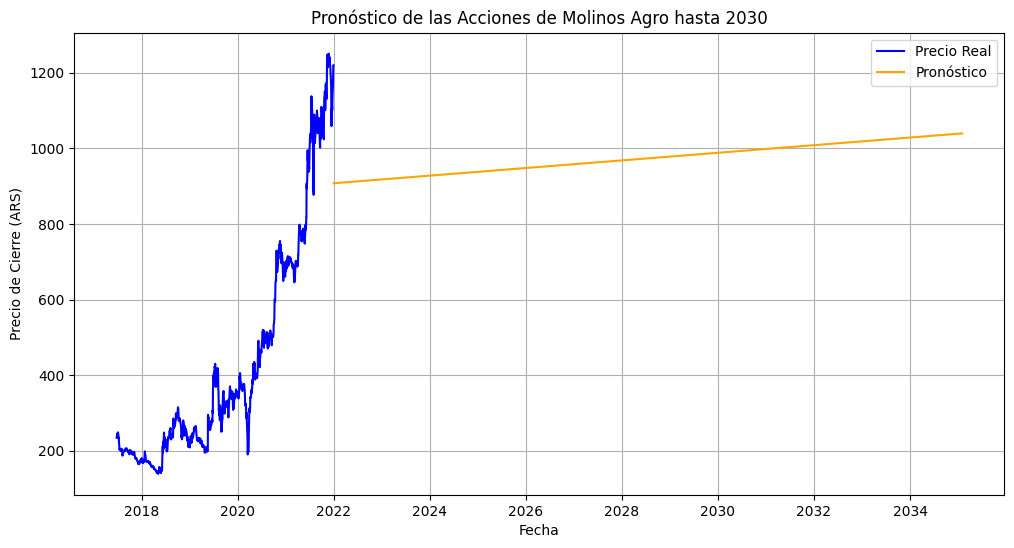

In [30]:

# Cargar el dataset con los datos históricos de precios de acciones
datos_mola = pd.read_csv('datos_mola.csv')
datos_mola['Date'] = pd.to_datetime(datos_mola['Date'])  # Convertir la columna de fechas a formato datetime
datos_mola.set_index('Date', inplace=True)  # Establecer la columna de fechas como índice

# Preparar los datos para el modelado
X = np.arange(len(datos_mola)).reshape(-1, 1)
y = datos_mola['Close']

# Entrenar un modelo de regresión de Ridge
modelo = Ridge(alpha=0.1)  # Puedes ajustar el valor de alpha según lo necesites
modelo.fit(X, y)

# Hacer predicciones sobre los precios futuros de las acciones
n_periodos_prediccion = 158  # Número de meses entre 2022 y 2030 (hasta diciembre de 2029)
n_periodos_totales = len(datos_mola) + n_periodos_prediccion
X_prediccion = np.arange(len(datos_mola), n_periodos_totales).reshape(-1, 1)
prediccion = modelo.predict(X_prediccion)

# Crear un rango de fechas para las predicciones
fechas_prediccion = pd.date_range(start=datos_mola.index[-1] + pd.Timedelta(days=1), periods=n_periodos_prediccion, freq='MS')

# Crear un DataFrame para almacenar las predicciones
predicciones_df = pd.DataFrame({'Date': fechas_prediccion, 'Close': prediccion})
predicciones_df.set_index('Date', inplace=True)

# Graficar la evolución de las acciones y el pronóstico
plt.figure(figsize=(12, 6))
plt.plot(datos_mola.index, datos_mola['Close'], label='Precio Real', color='blue')
plt.plot(predicciones_df.index, predicciones_df['Close'], label='Pronóstico', color='orange')
plt.title('Pronóstico de las Acciones de Molinos Agro hasta 2030')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (ARS)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(datos_mola['Close'], modelo.predict(X))
print(f"Error cuadrático medio (MSE): {mse:.2f}")

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(datos_mola['Close'], modelo.predict(X))
print(f"Error absoluto medio (MAE): {mae:.2f}")

Error cuadrático medio (MSE): 19038.18
Error absoluto medio (MAE): 111.25
